In [1]:
import torch
import numpy as np
import pandas as pd
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
import os
import shutil
import random
from IPython.display import clear_output
from PIL import Image
from io import BytesIO

In [2]:
conda activate cuda_env


Note: you may need to restart the kernel to use updated packages.


In [2]:
def load_color(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
def load_depth(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        x = int(filename[:-4])
        images.append([x,img])
    return images

In [12]:
import scipy.io 
def load_mat(folder):
    cur=[]
    for filename in os.listdir(folder):
        path = '1/1/depthframe/' + filename
        mat = scipy.io.loadmat(path)
        cur.append(mat)
    return cur

In [13]:
color_path  = "1/1/colorframe"
depth_path  = "1/1/depthframeimg"
mat = "1/1/depthframe"

In [14]:
colorimage = load_color(color_path)
depthimage = load_depth(depth_path)
mat_dep = load_mat(mat)
depthimage.sort()

In [15]:
print(len(colorimage))
print(len(depthimage))
print(len(mat_dep))

1543
1662
1662


In [16]:
print(len(depthimage[0]))

2


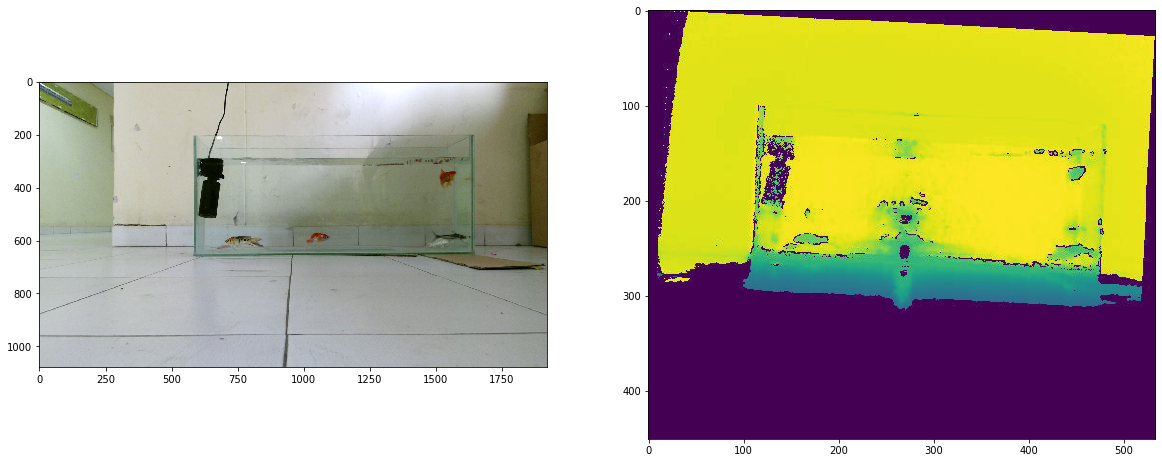

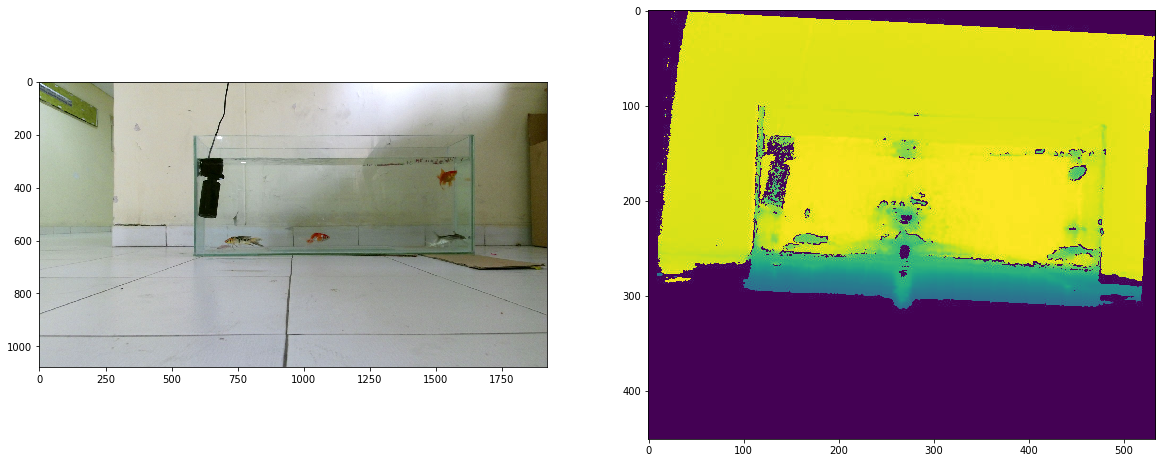

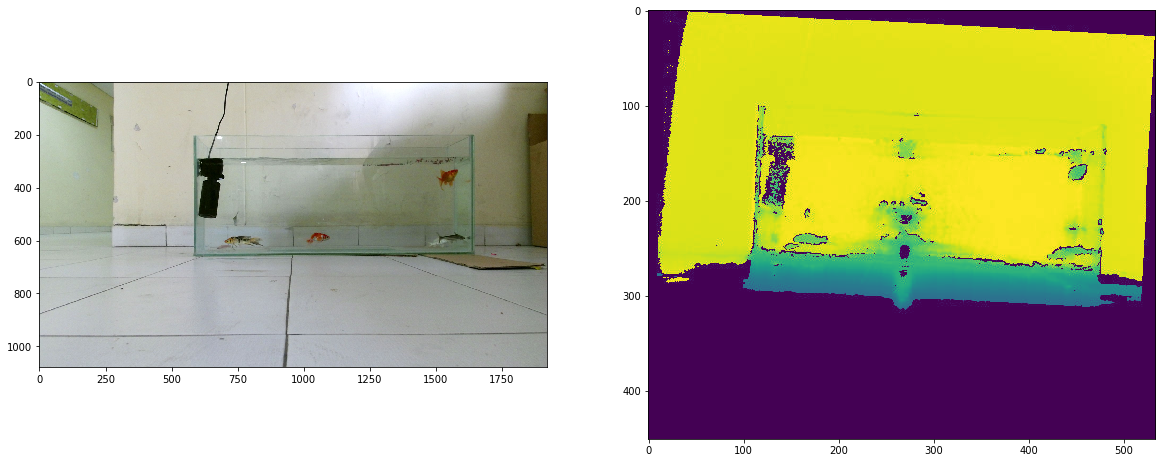

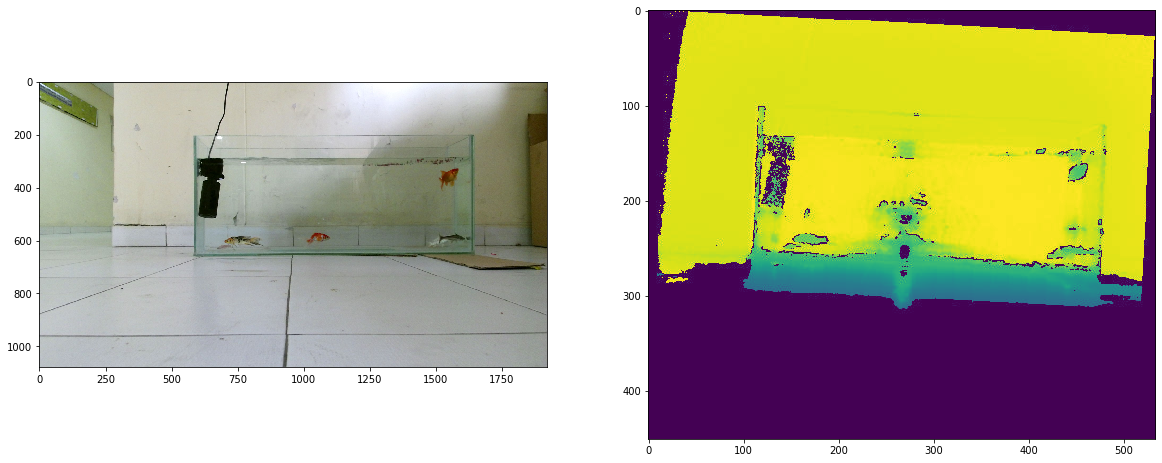

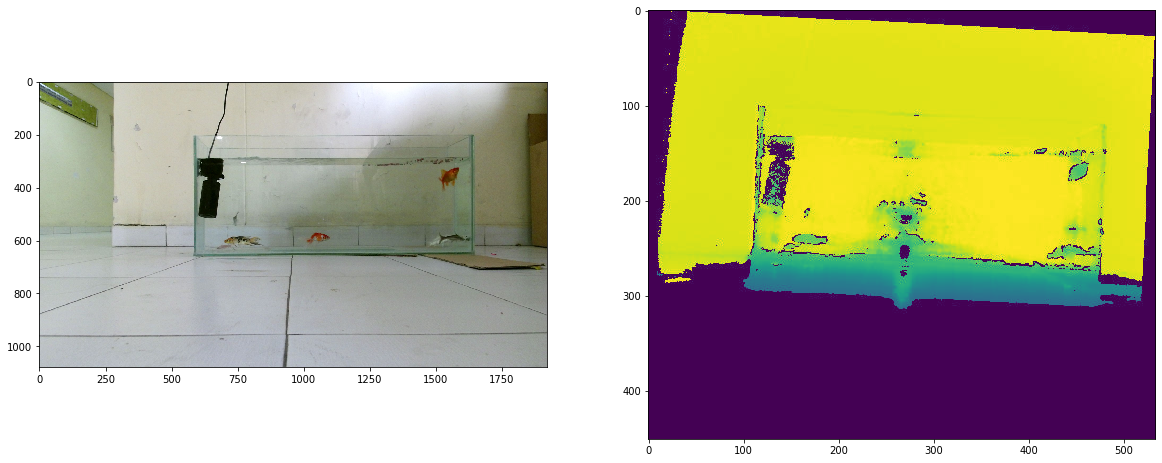

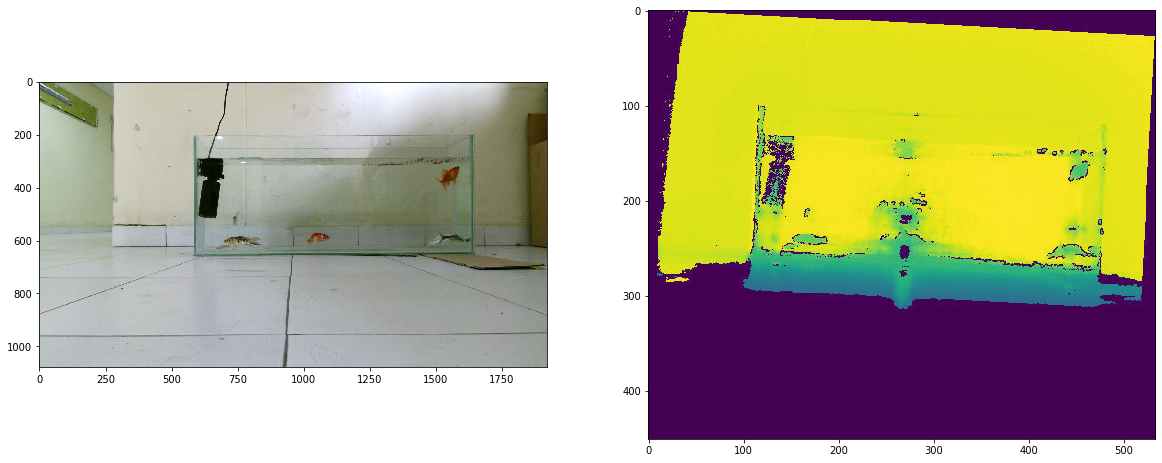

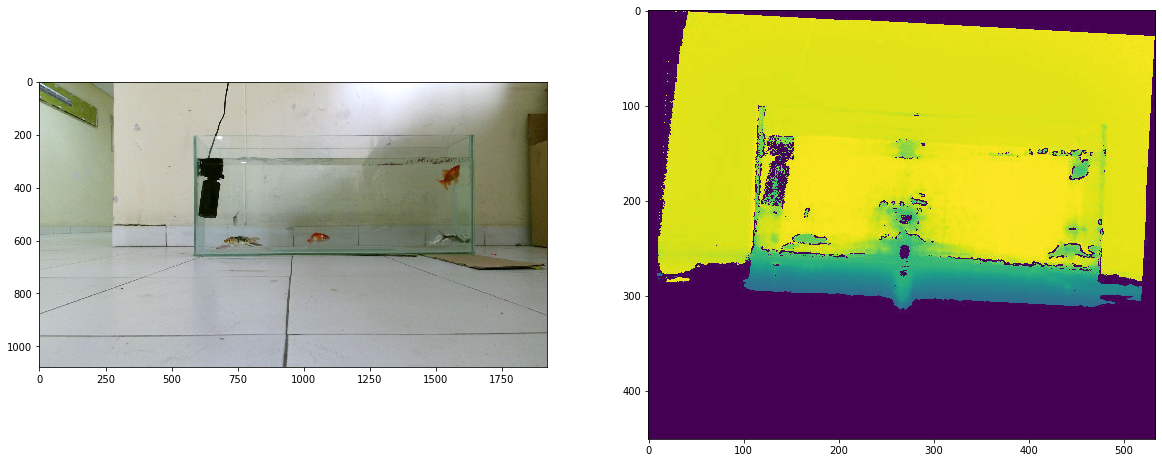

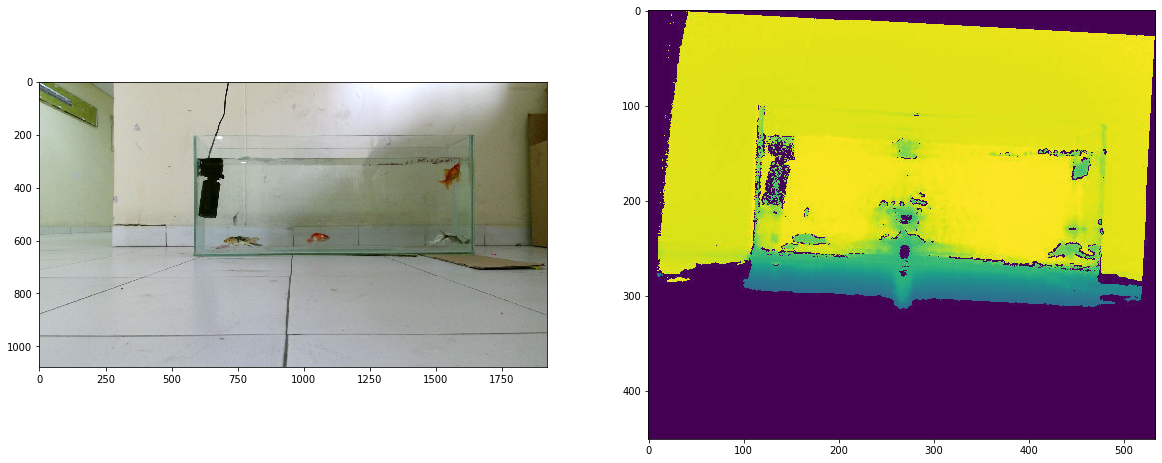

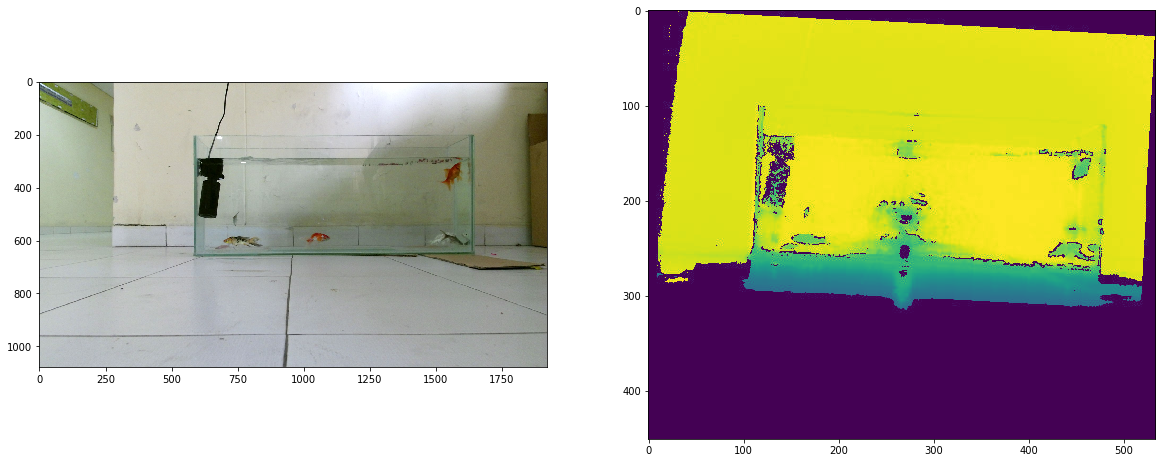

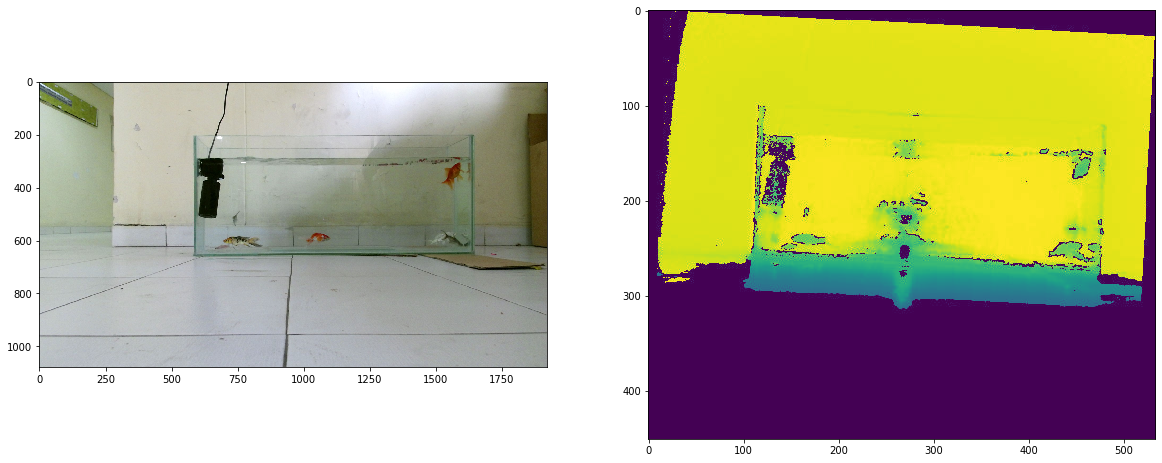

In [17]:
for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(colorimage[i])
    ax2.imshow(depthimage[i][1])

In [21]:
colortime = "1/1/timestamps/Absolute_Time_color.txt"
depthtime = "1/1/timestamps/Absolute_Time_depth.txt"

In [22]:
def load_time(filename):
    timestamp=open(filename,'r')
    stamp = []
    rl=timestamp.readlines()
    for num in rl:
        stamp.append(int(num))
    return stamp

In [23]:
colorstamp = load_time(colortime)
print(len(colorstamp))

1506


In [24]:
for num in colorstamp:
    print(num)

190919155112809
190919155112841
190919155112876
190919155112909
190919155112941
190919155112976
190919155113009
190919155113041
190919155113076
190919155113109
190919155113141
190919155113176
190919155113209
190919155113241
190919155113276
190919155113309
190919155113341
190919155113376
190919155113409
190919155113441
190919155113476
190919155113509
190919155113541
190919155113576
190919155113609
190919155113641
190919155113676
190919155113709
190919155113741
190919155113776
190919155113809
190919155113841
190919155113876
190919155113909
190919155113941
190919155113976
190919155114009
190919155114041
190919155114076
190919155114109
190919155114141
190919155114176
190919155114209
190919155114241
190919155114276
190919155114309
190919155114341
190919155114376
190919155114409
190919155114441
190919155114476
190919155114509
190919155114541
190919155114576
190919155114609
190919155114641
190919155114676
190919155114709
190919155114741
190919155114776
190919155114809
190919155114842
19091915

In [25]:
depthstamp = load_time(depthtime)
print(len(depthstamp))

1627


In [26]:
for num in depthstamp:
    print(num)

190919155112802
190919155112835
190919155112869
190919155112902
190919155112935
190919155112969
190919155113002
190919155113035
190919155113069
190919155113102
190919155113135
190919155113169
190919155113202
190919155113235
190919155113269
190919155113302
190919155113335
190919155113369
190919155113402
190919155113435
190919155113469
190919155113502
190919155113535
190919155113569
190919155113602
190919155113635
190919155113669
190919155113702
190919155113735
190919155113769
190919155113802
190919155113835
190919155113869
190919155113902
190919155113935
190919155113969
190919155114002
190919155114035
190919155114069
190919155114102
190919155114135
190919155114169
190919155114202
190919155114235
190919155114269
190919155114302
190919155114335
190919155114369
190919155114402
190919155114435
190919155114469
190919155114502
190919155114535
190919155114569
190919155114602
190919155114635
190919155114669
190919155114702
190919155114735
190919155114769
190919155114802
190919155114835
19091915

In [27]:
plot_depth=[]
plot_color=[]
XC=[]
XD=[]
cnt=0
for num in colorstamp:
    plot_color.append(num%1000000)
    XC.append(cnt)
    cnt+=1
cnt=0
for num in depthstamp:
    plot_depth.append(num%1000000)
    XD.append(cnt)
    cnt+=1

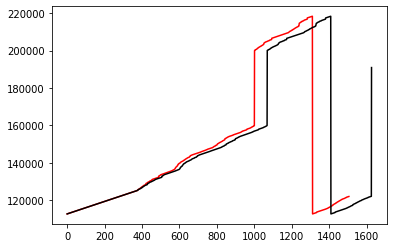

In [28]:
#import seaborn as sns
plt.plot(XC,plot_color,color='red')
plt.plot(XD,plot_depth,color='black')
plt.show()

In [29]:
color_jumps = []
depth_jumps = []
for i in range(1,1506):
    if(colorstamp[i]-colorstamp[i-1]>90):
        color_jumps.append(i)
for i in range(1,1627):
    if(depthstamp[i]-depthstamp[i-1]>90):
        depth_jumps.append(i)

In [30]:
ind=1
for x in color_jumps:
    print(ind," ",x)
    ind+=1

1   375
2   378
3   384
4   389
5   391
6   395
7   398
8   401
9   402
10   405
11   407
12   408
13   420
14   421
15   428
16   429
17   430
18   439
19   442
20   448
21   454
22   489
23   493
24   497
25   498
26   500
27   530
28   562
29   565
30   568
31   575
32   576
33   577
34   578
35   579
36   580
37   581
38   582
39   583
40   585
41   587
42   588
43   589
44   590
45   592
46   593
47   595
48   598
49   603
50   606
51   607
52   608
53   611
54   621
55   628
56   629
57   632
58   635
59   642
60   643
61   654
62   655
63   657
64   658
65   666
66   714
67   723
68   742
69   749
70   777
71   781
72   783
73   785
74   793
75   801
76   802
77   803
78   810
79   812
80   813
81   821
82   829
83   831
84   840
85   843
86   850
87   858
88   864
89   887
90   929
91   935
92   960
93   983
94   990
95   996
96   999
97   1001
98   1005
99   1014
100   1016
101   1020
102   1021
103   1027
104   1036
105   1039
106   1044
107   1047
108   1051
109   1056
110  

In [31]:
ind=1
for x in depth_jumps:
    print(ind," ",x)
    ind+=1

1   376
2   380
3   386
4   393
5   395
6   400
7   403
8   408
9   411
10   412
11   428
12   430
13   438
14   441
15   456
16   462
17   468
18   470
19   506
20   511
21   515
22   517
23   518
24   599
25   600
26   602
27   604
28   605
29   607
30   608
31   609
32   612
33   615
34   616
35   617
36   619
37   620
38   623
39   626
40   631
41   634
42   637
43   653
44   662
45   663
46   666
47   669
48   679
49   680
50   691
51   693
52   697
53   705
54   826
55   830
56   840
57   849
58   850
59   861
60   864
61   871
62   882
63   884
64   895
65   899
66   913
67   917
68   922
69   945
70   989
71   997
72   1022
73   1023
74   1049
75   1057
76   1067
77   1069
78   1074
79   1083
80   1086
81   1091
82   1092
83   1099
84   1110
85   1115
86   1121
87   1124
88   1128
89   1129
90   1130
91   1131
92   1134
93   1137
94   1149
95   1161
96   1173
97   1265
98   1267
99   1269
100   1278
101   1281
102   1288
103   1292
104   1296
105   1305
106   1310
107   1324
10

In [32]:
print(len(color_jumps))

157


In [33]:
print(len(depth_jumps))

131


In [34]:
cnt=1
Xc=[]
Xd=[]
for x in color_jumps:
    Xc.append(cnt)
    cnt+=1
cnt=1
for x in depth_jumps:
    Xd.append(cnt)
    cnt+=1

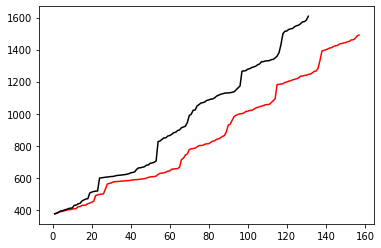

In [35]:
plt.plot(Xc,color_jumps,color='red')
plt.plot(Xd,depth_jumps,color='black')
plt.show()

In [36]:
print(depthstamp[518])

190919155133702


In [37]:
print(colorstamp[500])

190919155133709


In [38]:
final_color=[]
final_depth=[]

In [39]:
col=0
dep=0
cnt=0
for i in range(1200):
    if(abs(colorstamp[col]-depthstamp[dep])<20):
        x=cnt
        suffix=str(x).zfill(4)
        color_path = r"color_new\{}.jpg".format(suffix)
        depth_path = r"depth_new\{}.jpg".format(suffix)
        mat_path = r"mat_new\{}.mat".format(suffix)
        im1 = colorimage[col]
        im2 = depthimage[dep][1]
        im1 = im1.save(color_path)
        im2 = im2.save(depth_path)
        im3 = mat_dep[dep]
        scipy.io.savemat(mat_path,im3)
        cnt+=1
        col+=1
        dep+=1
    elif colorstamp[col]>depthstamp[dep]:
        dep+=1
    else:
        col+=1
    if(col>1000 or dep>1200):
        break